In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib

from pathlib import Path
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from pathlib import Path
from pymatgen.core import Structure, Composition, Element

# user-friendly print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# see https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
import torch
torch.set_float32_matmul_precision('high')

In [4]:
qc_ac_te_mp_dataset = pd.read_pickle('data/raw/qc_ac_te_mp_rebuild_T=290K_20250202.pd.xz')

qc_ac_te_mp_dataset.head(3)
qc_ac_te_mp_dataset.shape

,formula,hypermaterial_type,temperature,composition,elements,Thermal conductivity,Seebeck coefficient,Carrier concentration,Electrical conductivity,Thermopower,...,Density,Efermi,Final energy per atom,Formation energy per atom,Total magnetization,Volume,Magnetic susceptibility,Hall coefficient,Electronic contribution,Electronic thermal conductivity
id,,,,,,,,,,,,,,,,,,,,,
starry_0,(ErAs)0.003InGaAs,others,290,"(Er, As, In, Ga)","(Er, As, In, Ga)",3.2670491071158483,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qa_1,Al61.5Cu26.5Fe12,IQC,290,"(Al, Cu, Fe)","(Al, Cu, Fe)",1.4258964578008275,-1.1863527516689362e-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starry_2,Bi2Te2.4Se0.6,others,290,"(Bi, Te, Se)","(Bi, Te, Se)",NaN,NaN,-5.436073908332581e+24,1063.8779641515926,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(41017, 26)

In [5]:
ac_qc_starry_props = [
    "Seebeck coefficient",
    "Thermal conductivity",
    "Electrical resistivity",
    "Magnetic susceptibility",
    # "Specific heat capacity", 
    "Hall coefficient",
    "ZT",
    "Power factor",
    "Carrier concentration",
    "Electrical conductivity",
    "Thermopower",
    "Lattice thermal conductivity",
    "Hall mobility",
    "Electronic contribution",
    "Electronic thermal conductivity",
]

mp_props = [
    "Band gap",
    "Density",
    "Efermi",
    "Final energy per atom",
    "Formation energy per atom",
    "Total magnetization",
    "Volume",
]

all_props = ac_qc_starry_props + mp_props
qc_ac_te_mp_props = qc_ac_te_mp_dataset[all_props]

---

In [6]:
starry_props = [
    "Thermal conductivity",
    "Carrier concentration",
    "Electrical conductivity",
    "Thermopower",
    "Electrical resistivity",
    "Power factor",
    "Seebeck coefficient",
    "Lattice thermal conductivity",
    "ZT",
    "Hall mobility",
    "Electronic contribution",
    "Electronic thermal conductivity",
]

ac_qc_props = [
    "Seebeck coefficient",
    "Thermal conductivity",
    "Electrical resistivity",
    "Magnetic susceptibility",
    # "Specific heat capacity",
    "Hall coefficient",
    "ZT",
    "Power factor",
]

mp_props = [
    "Band gap",
    "Density",
    "Efermi",
    "Final energy per atom",
    "Formation energy per atom",
    "Total magnetization",
    "Volume",  
]

ac_qc_starry_shared_props = [
    "Seebeck coefficient",
    "Thermal conductivity",
    "Electrical resistivity",
    "Power factor",
    "ZT",
]

ac_qc_starry_props = [
    "Seebeck coefficient",
    "Thermal conductivity",
    "Electrical resistivity",
    "Magnetic susceptibility",
    # "Specific heat capacity",
    "Hall coefficient",
    "ZT",
    "Power factor",
    "Carrier concentration",
    "Electrical conductivity",
    "Thermopower",
    "Lattice thermal conductivity",
    "Hall mobility",
    "Electronic contribution",
    "Electronic thermal conductivity",
]

all_props = ac_qc_starry_props + mp_props

qc_ac_te_mp_props = qc_ac_te_mp_dataset[all_props]

In [7]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal').set_output(transform="pandas")

qc_ac_te_mp_props = qt.fit_transform(qc_ac_te_mp_props)

qc_ac_te_mp_props.shape
qc_ac_te_mp_props.head(3)

(41017, 21)

,Seebeck coefficient,Thermal conductivity,Electrical resistivity,Magnetic susceptibility,Hall coefficient,ZT,Power factor,Carrier concentration,Electrical conductivity,Thermopower,...,Hall mobility,Electronic contribution,Electronic thermal conductivity,Band gap,Density,Efermi,Final energy per atom,Formation energy per atom,Total magnetization,Volume
id,,,,,,,,,,,,,,,,,,,,,
starry_0,NaN,-0.059097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qa_1,-0.435268,-0.827448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starry_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.199338,-1.17006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----

In [8]:
from xenonpy.descriptor import Compositions
from sklearn.preprocessing import MinMaxScaler, StandardScaler

featurizers = ['WeightedAverage', 'WeightedVariance', 'MaxPooling', 'MinPooling']
comp_calc = Compositions(featurizers=featurizers, n_jobs=20)  # use specific featurizers

In [9]:
all_comp_desc = comp_calc.fit_transform(qc_ac_te_mp_dataset).dropna()
qc_ac_te_mp_props = qc_ac_te_mp_props.loc[all_comp_desc.index]

all_comp_desc.shape
all_comp_desc.head(3)

# s_scaler = StandardScaler().set_output(transform="pandas")
# all_comp_std_desc = s_scaler.fit_transform(all_comp_desc)

# all_comp_std_desc.head(3)

(40975, 232)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
id,,,,,,,,,,,,,,,,,,,,,
starry_0,37.692282,148.686294,236.696274,13.537758,86.556599,1968.408516,61.147068,454.500998,127.719228,129.027944,...,2.0,4.0,0.168,15.00,185.0,188.0,236.0,339.1,1215.0,4.31
qa_1,18.800000,136.985000,231.610000,8.883500,40.134736,2800.460000,104.240000,455.520000,126.435000,121.090000,...,1.0,3.0,0.385,80.00,184.0,225.0,223.0,291.2,3570.0,6.20
starry_2,62.240000,161.600000,243.040000,20.340000,154.316680,1474.412000,44.596000,459.240000,139.840000,139.600000,...,2.0,4.0,0.124,0.52,190.0,182.0,229.0,420.5,1790.0,3.77


## NN model

In [10]:
used_props = qc_ac_te_mp_props[all_props].dropna(how='all')
used_desc = all_comp_desc.loc[used_props.index]

In [11]:
from foundation_model.configs.model_config import ExperimentConfig, ModelConfig
from foundation_model.data.datamodule import CompoundDataModule
from foundation_model.data.preprocessor import AttributePreprocessor
from foundation_model.data.splitter import MultiTaskSplitter
from foundation_model.models.multi_task import MultiTaskAttributePredictor
from foundation_model.utils.training import training

In [25]:
i = used_props.index
a = used_props.iloc[[not (i_.startswith('starry') or i_.startswith('qa')) for i_ in i]]
b = used_props.iloc[[(i_.startswith('starry') or i_.startswith('qa')) for i_ in i]]

a.head(3)
a.shape

b.head(3)
b.shape

,Seebeck coefficient,Thermal conductivity,Electrical resistivity,Magnetic susceptibility,Hall coefficient,ZT,Power factor,Carrier concentration,Electrical conductivity,Thermopower,...,Hall mobility,Electronic contribution,Electronic thermal conductivity,Band gap,Density,Efermi,Final energy per atom,Formation energy per atom,Total magnetization,Volume
id,,,,,,,,,,,,,,,,,,,,,
mp-862690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.199338,0.687282,0.785724,0.915033,3.089935,0.514296,-0.449988
mp-861724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.199338,1.481226,0.993780,0.242878,1.022107,-0.233490,-0.857431
mp-1183076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.199338,1.011287,0.842310,0.942019,0.962593,0.993921,-0.679538


(33065, 21)

,Seebeck coefficient,Thermal conductivity,Electrical resistivity,Magnetic susceptibility,Hall coefficient,ZT,Power factor,Carrier concentration,Electrical conductivity,Thermopower,...,Hall mobility,Electronic contribution,Electronic thermal conductivity,Band gap,Density,Efermi,Final energy per atom,Formation energy per atom,Total magnetization,Volume
id,,,,,,,,,,,,,,,,,,,,,
starry_0,NaN,-0.059097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qa_1,-0.435268,-0.827448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starry_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.199338,-1.17006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(7910, 21)

In [36]:
# Prepare datasets
property_fractions = {
    'Seebeck coefficient': 1.,
    'Thermal conductivity': 0.1,
    'Electrical resistivity': 0.1,
    'Magnetic susceptibility': 1.,
    # 'Specific heat capacity': 1.,
    'Electrical conductivity': 1.,
    'ZT': 1.,
    'Hall coefficient': 1.,
    'Power factor': 1.,
    'Carrier concentration': 1.,
    'Thermopower': 1.,
    'Lattice thermal conductivity': 1.,
    'Hall mobility': 1.,
    'Electronic contribution': 1.,
    'Electronic thermal conductivity': 1.,
    'Band gap': 1.,
    'Density': 1.,
    'Efermi': 1.,
    'Final energy per atom': 1.,
    'Formation energy per atom': 0.2,
    'Total magnetization': 0.2,
    'Volume': 0.
}

In [37]:
preprocessor = AttributePreprocessor(attribute_rates=property_fractions)
processed_attrs = preprocessor.process(used_props)

i = processed_attrs.index
a = processed_attrs.iloc[[not (i_.startswith('starry') or i_.startswith('qa')) for i_ in i]]
b = processed_attrs.iloc[[(i_.startswith('starry') or i_.startswith('qa')) for i_ in i]]

a.head(3)
a.shape
a.columns

b.head(3)
b.shape
b.columns

,Seebeck coefficient,Thermal conductivity,Electrical resistivity,Magnetic susceptibility,Hall coefficient,ZT,Power factor,Carrier concentration,Electrical conductivity,Thermopower,Lattice thermal conductivity,Hall mobility,Electronic contribution,Electronic thermal conductivity,Band gap,Density,Efermi,Final energy per atom,Formation energy per atom,Total magnetization
id,,,,,,,,,,,,,,,,,,,,
mp-862690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.199338,0.687282,0.785724,0.915033,NaN,NaN
mp-861724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.199338,1.481226,0.993780,0.242878,NaN,NaN
mp-1183076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.199338,1.011287,0.842310,0.942019,NaN,NaN


(33065, 20)

Index(['Seebeck coefficient', 'Thermal conductivity', 'Electrical resistivity',
       'Magnetic susceptibility', 'Hall coefficient', 'ZT', 'Power factor',
       'Carrier concentration', 'Electrical conductivity', 'Thermopower',
       'Lattice thermal conductivity', 'Hall mobility',
       'Electronic contribution', 'Electronic thermal conductivity',
       'Band gap', 'Density', 'Efermi', 'Final energy per atom',
       'Formation energy per atom', 'Total magnetization'],
      dtype='object')

,Seebeck coefficient,Thermal conductivity,Electrical resistivity,Magnetic susceptibility,Hall coefficient,ZT,Power factor,Carrier concentration,Electrical conductivity,Thermopower,Lattice thermal conductivity,Hall mobility,Electronic contribution,Electronic thermal conductivity,Band gap,Density,Efermi,Final energy per atom,Formation energy per atom,Total magnetization
id,,,,,,,,,,,,,,,,,,,,
starry_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qa_1,-0.435268,-0.827448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starry_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.199338,-1.17006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(7910, 20)

Index(['Seebeck coefficient', 'Thermal conductivity', 'Electrical resistivity',
       'Magnetic susceptibility', 'Hall coefficient', 'ZT', 'Power factor',
       'Carrier concentration', 'Electrical conductivity', 'Thermopower',
       'Lattice thermal conductivity', 'Hall mobility',
       'Electronic contribution', 'Electronic thermal conductivity',
       'Band gap', 'Density', 'Efermi', 'Final energy per atom',
       'Formation energy per atom', 'Total magnetization'],
      dtype='object')

In [11]:
splitter = MultiTaskSplitter(
    train_ratio=0.8, val_ratio=0.2, test_ratio=0.0, random_state=42
)

In [14]:
train_idx, val_idx, test_idx = splitter.split(processed_attrs)

/data/foundation_model/src/foundation_model/data/splitter.py:121: UserWarning: Task Density has no unallocated data points. Using already allocated indices.
  warnings.warn(
/data/foundation_model/src/foundation_model/data/splitter.py:121: UserWarning: Task Efermi has no unallocated data points. Using already allocated indices.
  warnings.warn(
/data/foundation_model/src/foundation_model/data/splitter.py:121: UserWarning: Task Final energy per atom has no unallocated data points. Using already allocated indices.
  warnings.warn(


In [15]:
val_idx.size

21026

In [16]:
train_idx.size

39343

In [24]:
datamodule = CompoundDataModule(
    descriptor=used_desc,
    attributes=processed_attrs,
    train_idx=train_idx,
    val_idx=val_idx,
    test_idx=test_idx,
    batch_size=5,
    num_workers=0,
)

In [27]:
# Initialize model
shared_block_dims = [used_desc.shape[1], 128, 64]
task_block_dims = [64, 32, 16, 1]
model = MultiTaskAttributePredictor(
    shared_block_dims=shared_block_dims,
    task_block_dims=task_block_dims,
    n_tasks=len(processed_attrs.columns),
    norm_shared=True,
    norm_tasks=True,
    residual_shared=True,
    residual_tasks=True,
    shared_block_lr=0.001,
    task_block_lr=0.01
)
# model
# model = torch.compile(model)

In [28]:
training(
    model=model,
    datamodule=datamodule,
    max_epochs=1,
    accelerator='cpu',
    devices=1,
)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/lightning/pytorch/core/optimizer.py:317: The lr scheduler dict contains the key(s) ['monitor'], but the keys will be ignored. You need to call `lr_scheduler.step()` manually in manual optimization.

  | Name          | Type        | Params | Mode 
------------------------------------------------------
0 | shard_block   | LinearBlock | 80.6 K | train
1 | deposit_layer | Sequential  | 4.2 K  | train
2 | task_blocks   | ModuleList  | 111 K  | train
------------------------------------------------------
196 K     Trainable params
0         Non-trainable params
196 K     Total params
0.784     Total estimated model params size (MB)
610   

Sanity Checking: |                                                                               | 0/? [00:00<…

/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/lightning/pytorch/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Training: |                                                                                      | 0/? [00:00<…


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

---

In [12]:
%debug

> /data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/IPython/core/compilerop.py(86)ast_parse()
     84         Arguments are exactly the same as ast.parse (in the standard library),
     85         and are passed to the built-in compile function."""
---> 86         return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
     87 
     88     def reset_compiler_flags(self):



ipdb>  q


/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,r2,mae,rmse,property
0,0.323127,0.587736,0.864587,Seebeck coefficient
1,0.389243,0.582983,0.822376,Thermal conductivity
2,0.434651,0.531367,0.794534,Electrical resistivity
3,-2.512744,1.954948,3.086743,Magnetic susceptibility
4,NaN,10.567348,10.567348,Specific heat capacity
5,0.000000,0.118831,0.118847,Hall coefficient


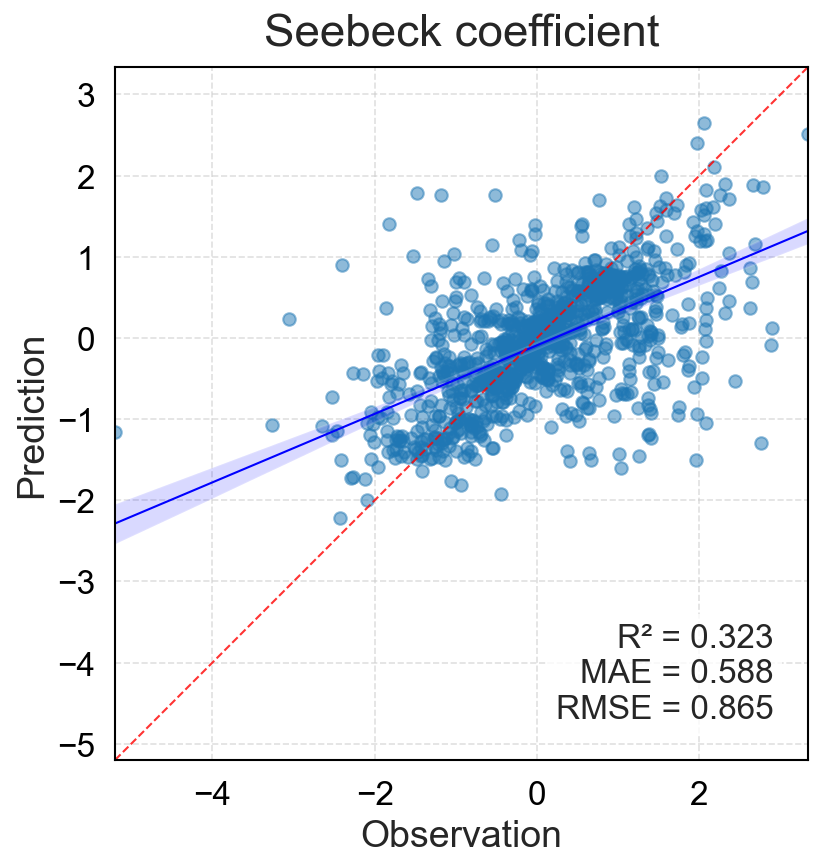

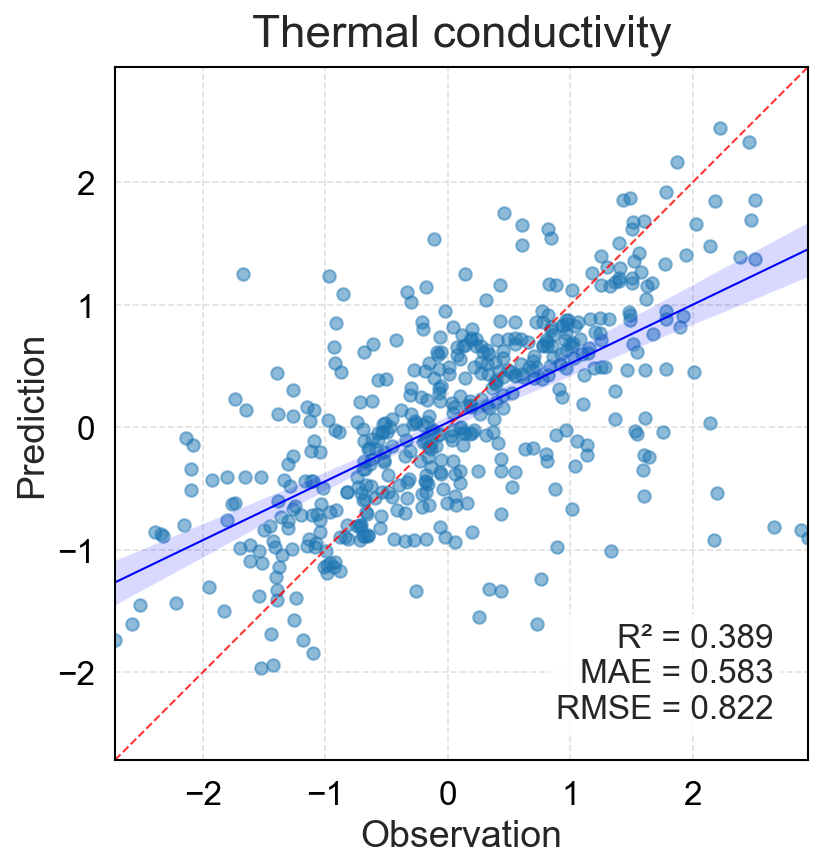

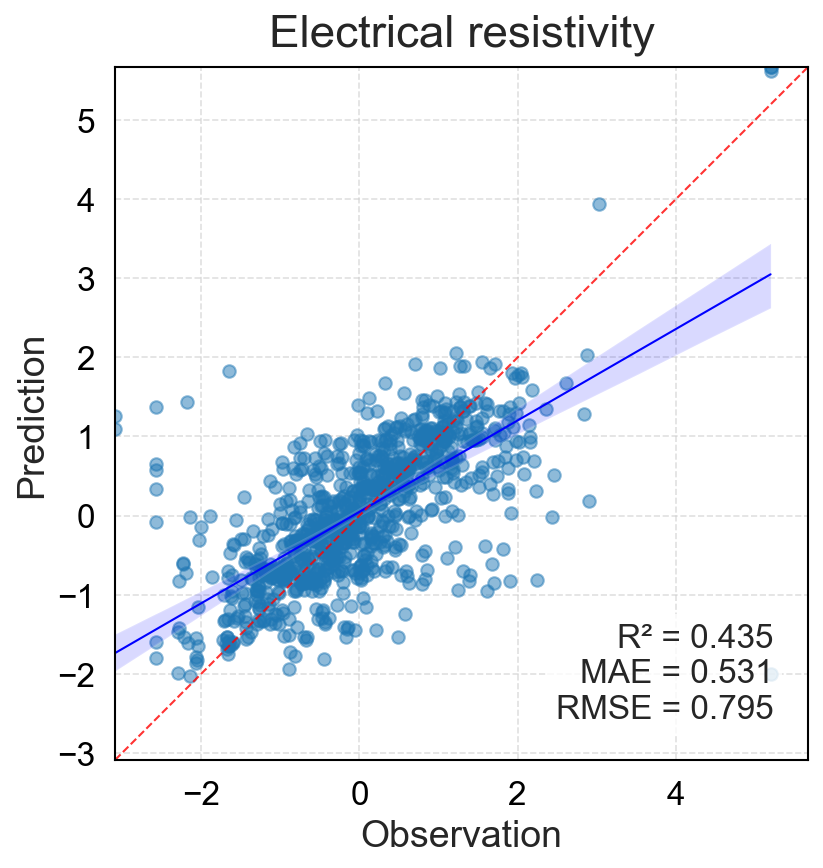

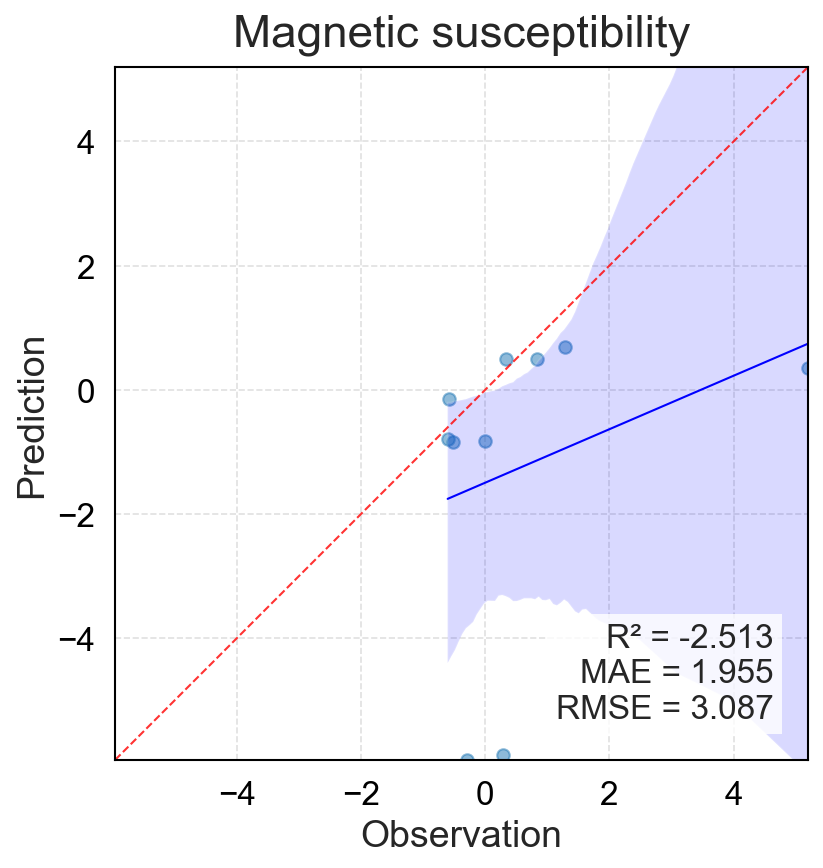

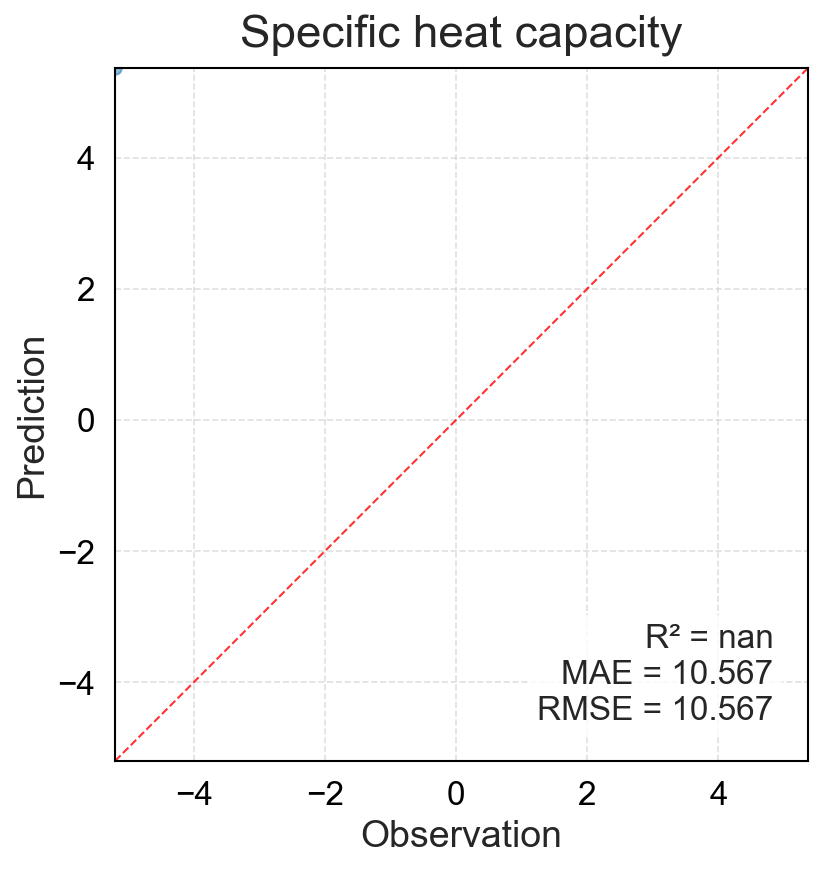

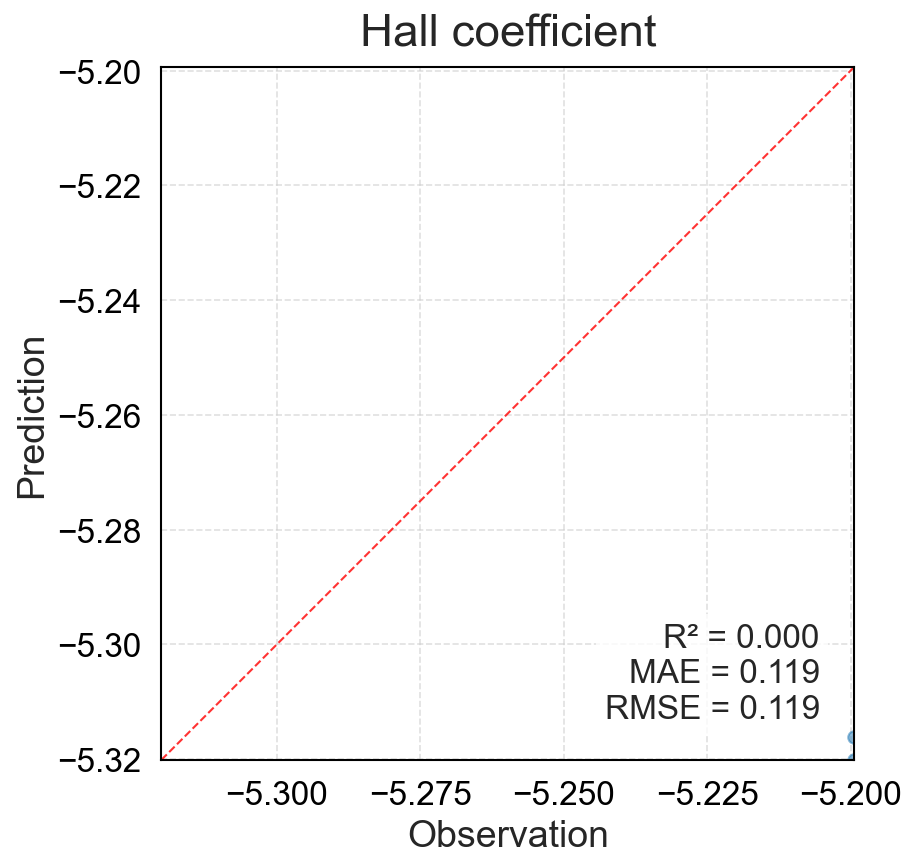

In [208]:
plot_predictions(all_preds, all_targets, all_masks, savefig='images/multi_tasks/', suffix='all_qc_ac_te_data', return_stat=True)

In [ ]:
%run multi_task.py
%run plot_utils.py

In [22]:
from typing import Optional, Dict, List, Tuple
import torch
import pandas as pd
from pathlib import Path
# from multi_task import scaling_laws_test, CompoundDataset

def test_all_properties(
    descriptor_df: pd.DataFrame,
    property_df: pd.DataFrame,
    device: str = 'cuda'
) -> Dict[str, Dict[str, Tuple[List[float], List[float], List[float]]]]:
    """
    Test scaling laws for all properties in both vary_target and vary_others modes.
    
    Args:
        descriptor_df: DataFrame containing input features
        property_df: DataFrame containing property values
        device: Device to run the model on ('cpu' or 'cuda')
    
    Returns:
        Dict with structure:
        {
            property_name: {
                'vary_target': (test_losses, test_losses_std, fractions),
                'vary_others': (test_losses, test_losses_std, fractions)
            }
        }
        where:
        - test_losses: List of mean test losses for each fraction
        - test_losses_std: List of standard deviations of test losses
        - fractions: List of data fractions used
    """
    results: Dict[str, Dict[str, Tuple[List[float], List[float], List[float]]]] = {}
    
    # Create results directory
    results_dir = Path('images/multi_tasks/scaling_laws')
    results_dir.mkdir(parents=True, exist_ok=True)
    
    # Test each property
    for property_name in CompoundDataset.ATTRIBUTES:
        if property_name != 'seebeck_coefficient':
            continue
        results[property_name] = {}
        print(f"\n{'='*80}")
        print(f"Testing scaling laws for {property_name}")
        print(f"{'='*80}")
        
        # Test vary_target mode
        print(f"\nMode: vary_target (varying {property_name} data while fixing others)")
        results[property_name]['vary_target'] = scaling_laws_test(
            descriptor=descriptor_df,
            property_data=property_df,
            target_property=property_name,
            mode='vary_target',
            device=device
        )
        
        # # Test vary_others mode
        # print(f"\nMode: vary_others (fixing {property_name} while varying others)")
        # results[property_name]['vary_others'] = scaling_laws_test(
        #     descriptor=descriptor_df,
        #     property_data=property_df,
        #     target_property=property_name,
        #     mode='vary_others',
        #     device=device
        # )

    return results

In [23]:
if __name__ == '__main__':
    # Example usage
    
    # Check for CUDA availability
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")
    
    # Run tests
    scaling_results = test_all_properties(used_props, used_props, device=device)

Epoch [91/100], Training Loss: 4.2651

Test Losses by Attribute:
electrical_resistivity: 9.7488
thermal_conductivity: 0.8889
seebeck_coefficient: 2.3087
power_factor: 3.9028
zt: 3.6565
hall_coefficient: 10.2821
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0005
    maximize: False
    weight_decay: 0
)
Epoch [1/100], Training Loss: 17.2831
Epoch [11/100], Training Loss: 9.2160
Epoch [21/100], Training Loss: 7.2978
Epoch [31/100], Training Loss: 6.1254
Epoch [41/100], Training Loss: 5.4639
Epoch [51/100], Training Loss: 4.9149
Epoch [61/100], Training Loss: 4.7575
Epoch [71/100], Training Loss: 4.5109
Epoch [81/100], Training Loss: 4.1791
Epoch [91/100], Training Loss: 3.9139

Test Losses by Attribute:
electrical_resistivity: 11.5605
thermal_conductivity: 1.0197
seebeck_coefficient: 2.0764
power_factor: 3.9222
zt: 3.6494
hall_coefficient: 6.9492

Testing with 

In [ ]:
import joblib

with open('scaling_results.pkl.z', 'wb') as fo:  
   joblib.dump(scaling_results, fo)